<a href="https://colab.research.google.com/github/sunidhib2002/Heart-Disease-Prediction-/blob/main/Heart_Disease_Predicition_using_Naive_Bayes_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# **Reading the DataSet**

In [ ]:
file_path = "/content/heart.csv"

In [ ]:
heart_data = pd.read_csv(file_path)

# **EDA -> Exploratory Data Analysis**

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# about various columns : 
# cp -> chest pain
# trestbps -> resting blood pressure
# chol -> cholestoral
# fbs -> fasting blood sugar
# ECG
# exang -> maximum heart rate achieved
# oldpeak -> 
# last column -> target -> 0: no disease, 1 -> disease 

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
heart_data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


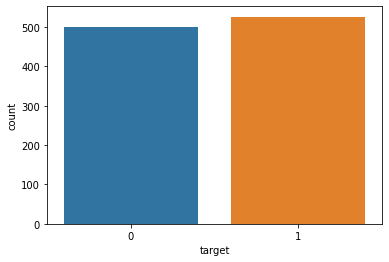

In [ ]:
# to see how many people have the disease in the given dataset, target = 1 means disease and 0 means no disease.
sns.countplot(x = 'target', data = heart_data)

In [ ]:
heart_data[heart_data['target'].isin([1])]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1


In [ ]:
heart_data.shape

(1025, 14)

In [ ]:
total = 1025
withDisease = 526
percentage = (withDisease / total) * 100
print(percentage)

51.31707317073171


In [ ]:
# The given dataset has 51% data of people with heart disease

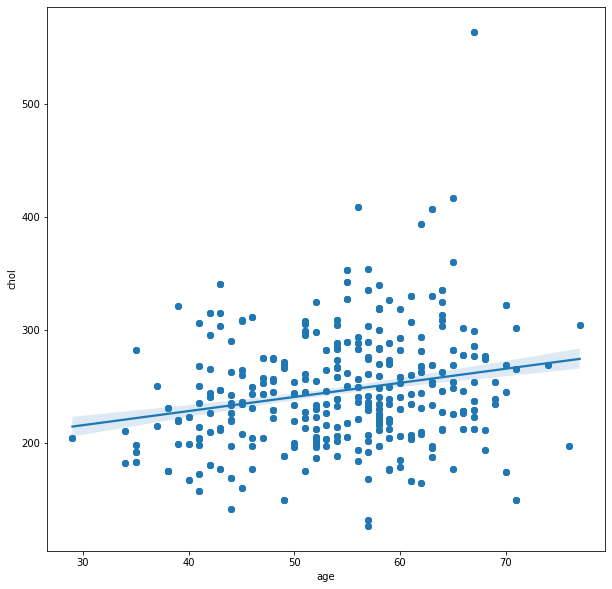

In [ ]:
plt.figure(figsize = (10, 10))
sns.regplot(x = heart_data['age'], y = heart_data['chol'])

In [ ]:
# as we can see from the graph, the slope is positive, this means that cholestoral increases with age.

In [ ]:
peopleWithDisease = heart_data[heart_data['target'].isin([1])]

In [ ]:
heart_data[heart_data['target'].isin([1])]['age'].value_counts().head(5)

54    32
41    29
51    29
52    28
44    26
Name: age, dtype: int64

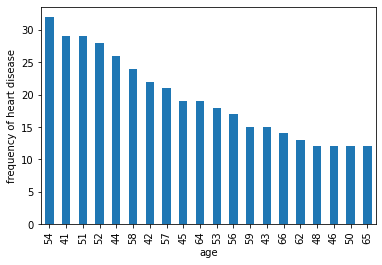

In [ ]:
plt.xlabel('age')
plt.ylabel('frequency of heart disease')
heart_data[heart_data['target'].isin([1])]['age'].value_counts().head(20).plot(kind = 'bar')

In [ ]:
# as per the data, people with 54 years of age are likely to have a heart problem

In [ ]:
heart_data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [ ]:
heart_data[heart_data['target'] == 1]['sex'].value_counts()

1    300
0    226
Name: sex, dtype: int64

In [ ]:
heart_data[heart_data['target'].isin([1])]['sex'].value_counts()

1    300
0    226
Name: sex, dtype: int64

In [ ]:
GenderWiseData = heart_data[heart_data['target'].isin([1])]['sex'].value_counts().reset_index()

In [ ]:
GenderWiseData.rename(columns = {'index' : 'Gender'}, inplace = True)

In [ ]:
GenderWiseData

,Gender,sex
0,1,300
1,0,226


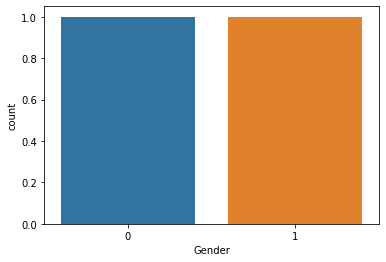

In [ ]:
sns.countplot(x = 'Gender', data = GenderWiseData)

In [ ]:
# from the above graph, we can see that heart diseases doesnot depend on gender

In [ ]:
# chest pain values ->
# 0 - 0.3 -> less pain
# 0.9 - 1.2 -> moderate pain
# 1.8 - 2.1 -> high pain
# 2.7- 3 -> extreme pain

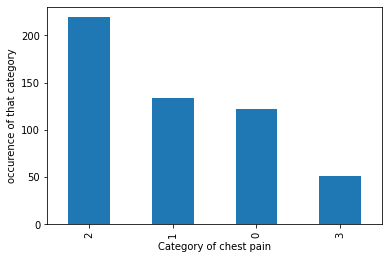

In [ ]:
plt.xlabel('Category of chest pain')
plt.ylabel('occurence of that category')
peopleWithDisease['cp'].value_counts().plot(kind = 'bar')

In [ ]:
# as seen from the above graph, poeple having the disease has value 2 for chest pain, which is high pain.
# So we can say that people with heart disease has high pain

In [ ]:
# cholestoral levels ->
# less than 200 -> desirable
# 200 - 239 -> borderline high
# 240 and above -> high

In [ ]:
peopleWithDisease['chol'].value_counts()

240    14
234    13
211    13
197    13
204    13
       ..
261     3
232     3
242     3
205     3
141     3
Name: chol, Length: 104, dtype: int64

In [ ]:
chol_values = []
chol_category = ["High(>=240)", "BorderLine High(200-239)", 'Desirable(<200)']

In [ ]:
# people with disease and cholestoral value 240 or high
print(peopleWithDisease[peopleWithDisease['chol'] >= 240].shape)
chol_values.append(236)

(236, 14)


In [ ]:
print(chol_values)

[236]


In [ ]:
print(peopleWithDisease[peopleWithDisease['chol'] < 200].shape)
chol_values.append(99)

(99, 14)


In [ ]:
print(peopleWithDisease[(peopleWithDisease['chol'] >= 200) & (peopleWithDisease['chol'] <= 239)].shape)

(191, 14)


In [ ]:
chol_values.append(191)

In [ ]:
print(chol_category)
print(chol_values)

['High(>=240)', 'BorderLine High(200-239)', 'Desirable(<200)']
[236, 99, 191]


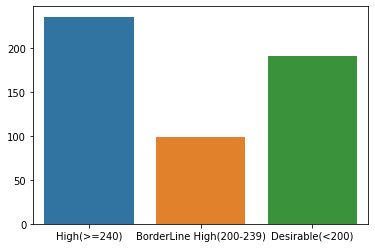

In [ ]:
sns.barplot(x = chol_category, y = chol_values)

In [ ]:
# as seen from the graph, people with disease has high cholestrol level that is 240 or above...

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heart_data['trestbps']

0       125
1       140
2       145
3       148
4       138
       ... 
1020    140
1021    125
1022    110
1023    110
1024    120
Name: trestbps, Length: 1025, dtype: int64

In [ ]:
heart_data[heart_data['trestbps'] >= 100]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
max(heart_data['trestbps'])

200

In [ ]:
min(heart_data['trestbps'])

94

In [ ]:
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [ ]:
peopleWithDisease['trestbps']

5       100
10      112
12      118
15      118
16      140
       ... 
1011    128
1014    108
1019    112
1020    140
1023    110
Name: trestbps, Length: 526, dtype: int64

In [ ]:
blood_pressure_values = []

In [ ]:
blood_pressure = ["Normal", "Elevated", "High Blood Pressure(Stage 1)", "High Blood Pressure(Stage 2)", "Hypertensive crisis"]

In [ ]:
blood_pressure_values.append(peopleWithDisease[peopleWithDisease['trestbps'] < 120].shape[0])

In [ ]:
blood_pressure_values.append(peopleWithDisease[(peopleWithDisease['trestbps'] >= 120) & (peopleWithDisease['trestbps'] <= 129)].shape[0])

In [ ]:
blood_pressure_values.append(peopleWithDisease[(peopleWithDisease['trestbps'] >= 130) & (peopleWithDisease['trestbps'] <= 139)].shape[0])

In [ ]:
blood_pressure_values.append(peopleWithDisease[(peopleWithDisease['trestbps'] >= 140)].shape[0])

In [ ]:
blood_pressure_values.append(peopleWithDisease[(peopleWithDisease['trestbps'] >= 180)].shape[0])

In [ ]:
print(blood_pressure_values)

[117, 128, 144, 137, 3]


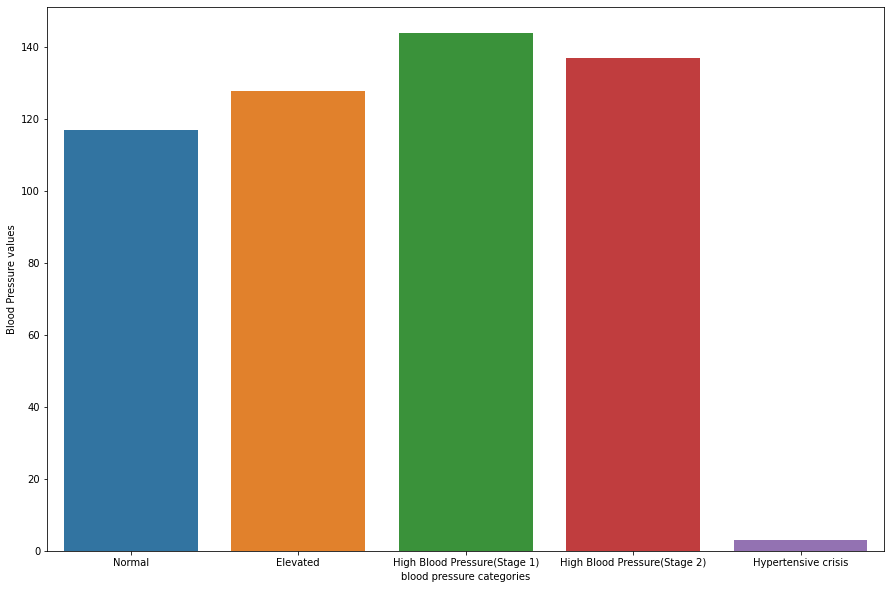

In [ ]:
plt.figure(figsize = (15, 10))
plt.xlabel("blood pressure categories")
plt.ylabel("Blood Pressure values")
sns.barplot(x = blood_pressure, y = blood_pressure_values)

In [ ]:
# As seen from the graph, people with heart problem are having high blood pressure(Stage 1)
# Therefore, it is likely to have high blood pressure if one is having a heart problem.

In [ ]:
heart_data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [ ]:
# thalach -> heart rate
# lets see if heart rate changes with age or not
# sns.regplot(x = heart_data['age'], y = heart_data['thalach'])

In [ ]:
# according to the above graph, the heart rate reduces with increasing age.

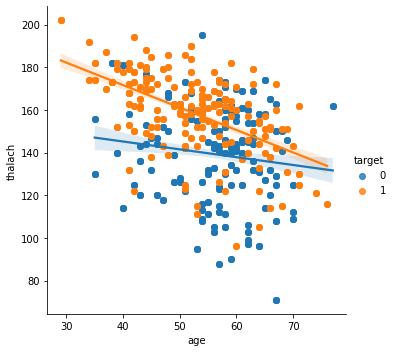

In [ ]:
sns.lmplot(x = "age", y = "thalach", hue = "target", data = heart_data)

In [ ]:
heart_data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [ ]:
# relation between exang -> exercise included angina

In [ ]:
heart_data['exang'].value_counts()

0    680
1    345
Name: exang, dtype: int64

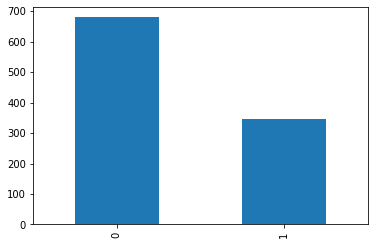

In [ ]:
heart_data['exang'].value_counts().plot(kind = 'bar')

In [ ]:
# usually people suffer less from angina

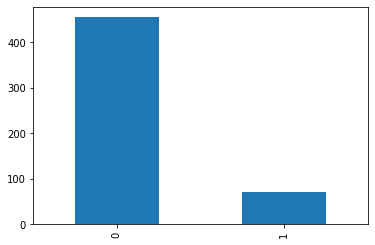

In [ ]:
peopleWithDisease['exang'].value_counts().plot(kind = 'bar')

In [ ]:
# people with heart disease, also have shown less angina

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


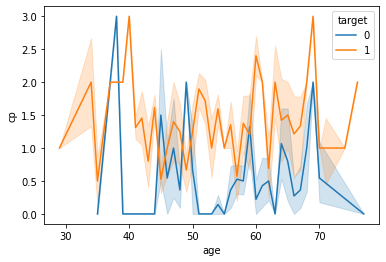

In [ ]:
sns.lineplot(x = "age", y = "cp", hue = "target", data = heart_data)

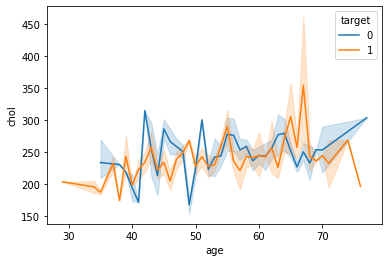

In [ ]:
sns.lineplot(x = "age", y = "chol", hue = "target", data = heart_data)

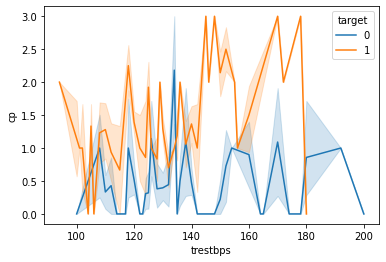

In [ ]:
sns.lineplot(x = heart_data['trestbps'], y = heart_data['cp'], hue = heart_data['target'])

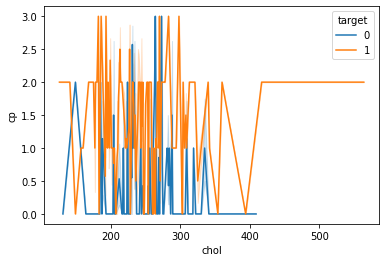

In [ ]:
sns.lineplot(x = heart_data['chol'], y = heart_data['cp'], hue = heart_data['target'])

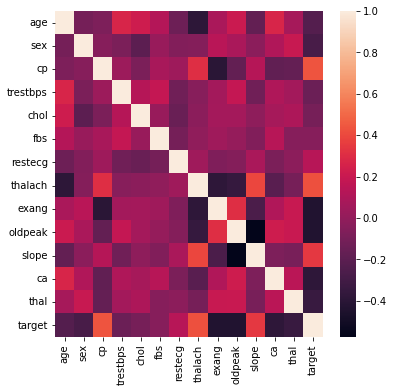

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(heart_data.corr())

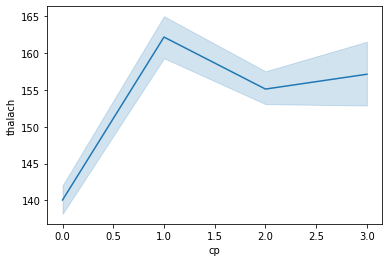

In [ ]:
sns.lineplot(x = heart_data['cp'], y = heart_data['thalach'])

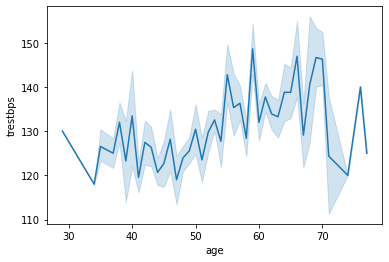

In [ ]:
sns.lineplot(x = heart_data['age'], y = heart_data['trestbps'])

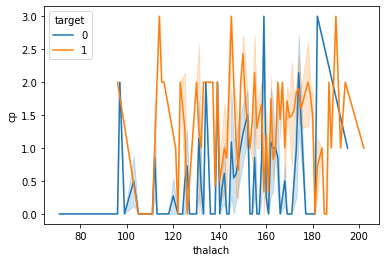

In [ ]:
# thalach -> maximum heart rate achieved
sns.lineplot(x = "thalach", y = "cp", hue = "target", data = heart_data)

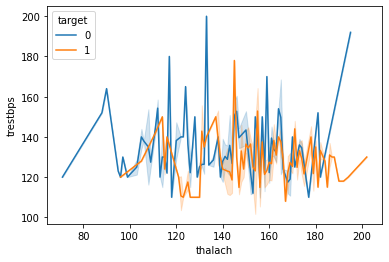

In [ ]:
sns.lineplot(x = "thalach", y = "trestbps", hue = "target", data = heart_data)

In [ ]:
heart_data.shape

(1025, 14)

In [ ]:
X = heart_data.iloc[:, 0:13]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
X['oldpeak'] = X['oldpeak'].astype(int)

In [ ]:
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1,2,2,3
1,53,1,0,140,203,1,0,155,1,3,0,0,3


In [ ]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
Y = heart_data['target']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# **Splitting the Training and Testing data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
print(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(Y_test, y_pred))

0.7857142857142857


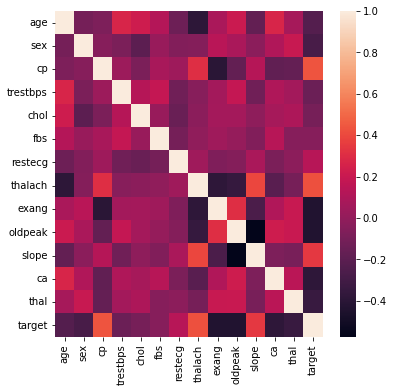

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(heart_data.corr())

In [ ]:
X = heart_data.iloc[:, 0:13]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
new = X.drop('trestbps', axis = 1)

In [ ]:
new.head()

,age,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,212,0,1,168,0,1.0,2,2,3
1,53,1,0,203,1,0,155,1,3.1,0,0,3
2,70,1,0,174,0,1,125,1,2.6,0,0,3
3,61,1,0,203,0,1,161,0,0.0,2,1,3
4,62,0,0,294,1,1,106,0,1.9,1,3,2


In [ ]:
new.shape

(1025, 12)

In [ ]:
Y.shape

(1025,)

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(new, Y, test_size = 0.2, random_state = 1)

In [ ]:
print(Y_train2.shape)
print(Y_test2.shape)
print(X_train2.shape)
print(X_test2.shape)

(820,)
(205,)
(820, 12)
(205, 12)


In [ ]:
gnb2 = GaussianNB()
gnb2.fit(X_train2, Y_train2)

GaussianNB()

In [ ]:
y_pred2 = gnb2.predict(X_test2)

In [ ]:
print(accuracy_score(Y_test2, y_pred2))

0.7804878048780488
